In [1]:
# import library

import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle

Using TensorFlow backend.


In [2]:
pwd

'C:\\Users\\kishan\\Desktop\\Digit Recognizer'

In [3]:
# Loa
myDigit = os.listdir("myDigits")

In [4]:
print("Total Classes in our dataset :--> ",len(myDigit))

Total Classes in our dataset :-->  10


In [5]:
path = "myDigits"
class_len = len(myDigit)

In [6]:
img_set = []
class_no = []

for num in range(0,class_len):
    myImgList = os.listdir(path +'/'+str(num))
    
    for img in myImgList:
        curr_img        = cv2.imread(path + '/' + str(num)+'/'+img)
        curr_img_resize = cv2.resize(curr_img,(32,32))
        img_set.append(curr_img_resize)
        class_no.append(num)
    print(num,end= " ")
print(" ")

print("Total Images in the list", len(img_set))
print("Total Class of Images", len(class_no))

0 1 2 3 4 5 6 7 8 9  
Total Images in the list 10160
Total Class of Images 10160


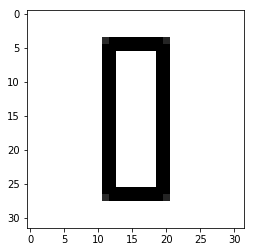

In [7]:
plt.imshow(img_set[0])

In [8]:
print(img_set[0].shape)

(32, 32, 3)


In [9]:
# Converting images to numpy array
images = np.array(img_set)
class_no = np.array(class_no)
print(images.shape)

(10160, 32, 32, 3)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(images,class_no,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)

In [11]:
print(X_train.shape)

(6502, 32, 32, 3)


In [12]:
print(X_test.shape)

(2032, 32, 32, 3)


In [13]:
print(X_validation.shape)

(1626, 32, 32, 3)


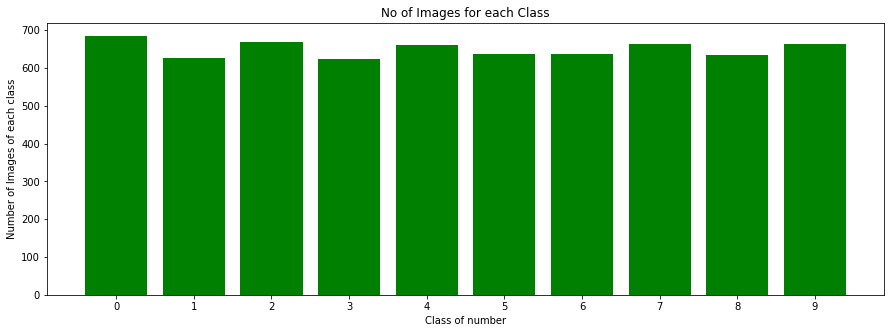

In [14]:
numOfSamples= []
for x in range(0,10):
    numOfSamples.append(len(np.where(y_train==x)[0]))
    
clas = ['0', '1', '2', '3', '4','5','6','7','8','9']
plt.figure(figsize=(15,5))
plt.bar(clas,numOfSamples,color='g')
plt.title("No of Images for each Class")
plt.xlabel("Class of number")
plt.ylabel("Number of Images of each class")
plt.show()

In [15]:
# print(np.where((y_train==1)))

In [16]:
#### PREPROCESSING FUNCTION FOR IMAGES FOR TRAINING 
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [17]:
# Preprocessing it and storing
X_train = list(map(preProcessing,X_train))
X_train = np.array(X_train) 

# Preprocessing it and storing
X_test = list(map(preProcessing,X_test))
X_test = np.array(X_test) 

# Preprocessing it and storing
X_validation = list(map(preProcessing,X_validation))
X_validation = np.array(X_validation) 

In [18]:
print(X_train.shape)

(6502, 32, 32)


In [19]:
X_train = X_train.reshape(X_train.shape[0],32,32,1)
X_test = X_test.reshape(X_test.shape[0],32,32,1)
X_validation = X_validation.reshape(X_validation.shape[0],32,32,1)

In [20]:
#### IMAGE AUGMENTATION 
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

In [21]:
#### ONE HOT ENCODING OF MATRICES
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_validation = to_categorical(y_validation,10)

In [22]:
X_train.shape

(6502, 32, 32, 1)

In [23]:
y_test.shape

(2032, 10)

In [24]:
y_validation.shape

(1626, 10)

In [25]:
# MODEL CREATION

filters = 60
size_filter1 = (5,5)
size_fFilter2 = (3, 3)



def model():
    model = Sequential()
    model.add(Conv2D(60,size_filter1,input_shape=(32,32,1),activation='relu'))
    model.add((Conv2D(60, size_filter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add((Conv2D(30, size_fFilter2, activation='relu')))
    model.add((Conv2D(30, size_fFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [26]:
model = model()
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
____________________

In [27]:
#### STARTING THE TRAINING PROCESS
history = model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),
                                 steps_per_epoch=2000,
                                 epochs=10,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2000/2000 [==============================] - 790s 395ms/step - loss: 0.2368 - acc: 0.9220 - val_loss: 0.0170 - val_acc: 0.9945
Epoch 2/10
2000/2000 [==============================] - 869s 435ms/step - loss: 0.0646 - acc: 0.9798 - val_loss: 0.0107 - val_acc: 0.9957
Epoch 3/10
2000/2000 [==============================] - 773s 387ms/step - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0141 - val_acc: 0.9957
Epoch 4/10
2000/2000 [==============================] - 804s 402ms/step - loss: 0.0394 - acc: 0.9878 - val_loss: 0.0112 - val_acc: 0.9963
Epoch 5/10
2000/2000 [==============================] - 800s 400ms/step - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0151 - val_acc: 0.9951
Epoch 6/10
2000/2000 [==============================] - 790s 395ms/step - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0122 - val_acc: 0.9963
Epoch 7/10
2000/2000 [==============================] - 797s 399ms/step - loss

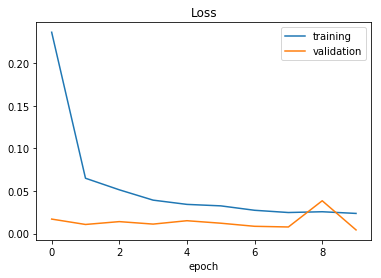

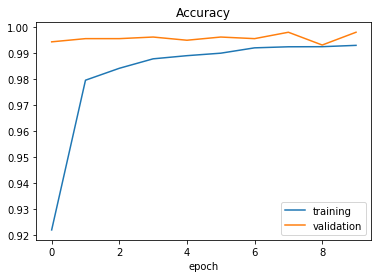

In [28]:
#### PLOT THE RESULTS  
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [29]:
#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.014709974010125594
Test Accuracy = 0.9965551181102362


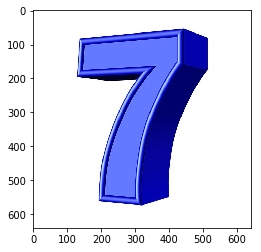

In [31]:
img = cv2.imread("seven.jpg")
plt.imshow(img)

In [32]:
img.shape

(640, 640, 3)

In [33]:
img = np.asarray(img)
img = cv2.resize(img,(32,32))
img = preProcessing(img)
img = img.reshape(1,32,32,1)

In [34]:
img.shape

(1, 32, 32, 1)

In [35]:
#### PREDICT
classIndex = int(model.predict_classes(img))

In [36]:
classIndex

7

In [30]:
model.save("my_model_10.h5") #using h5 extension
print("model saved!!!")

model saved!!!


# Thank You